<h1> Asignatura Sistemas Inteligentes </h1>
<h1> Examen Práctico </h1>

A continuación se proponen unas actividades que se deben realizar aplicadas al conjunto de datos que le haya sido asignado para el examen. El examen se debe responder en celdas de código a continación de cada pregunta. El archivo debe subirse en la plataforma a más tardar el 8 de diciembre. La sustentación y la parte oral del examen serán el miércoles 9 de diciembre. Si no se ha apuntado para esta sustentación por favor hacerlo.

1. (Valor 0,5) Cargar el archivo asignado y mediante funciones de python y las librerías indicar: Cuantos registros y atributos contiene, y cuántos ejemplos hay de cada clase.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import statistics
from sklearn import preprocessing

# Se carga el conjunto de datos
url="https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
data = pd.read_csv(url, header = None, na_values=" ?")

#Ponemos nombre a las columnas
data.columns = ["Recency", "Frequency", "Monetary", "Time", "Donating"]

# Se borra la fila 0 porque contiene el header original del Dataset (son muy largos algunos nombres)
data = data.iloc[1:]

# Se obtiene la cantidad de registros y atributos del conjunto de datos
registros, atributos = data.shape

print("El conjunto de Datos tiene {} registros y {} atributos".format(registros, atributos))

# Se convierte a los tipos de dato indicados ( de object a numerico )
data[["Recency", "Frequency", "Monetary", "Time", "Donating"]] = data[["Recency", "Frequency", "Monetary", "Time", "Donating"]].astype('float64')

# Se calcula la cantidad de ejemplos que hay por cada clase
no_donaron, donaron = data["Donating"].value_counts()
print("No donaron : {} personas (clase 0)\nDonaron: {} personas (clase 1)".format(no_donaron, donaron))


El conjunto de Datos tiene 748 registros y 5 atributos
No donaron : 570 personas (clase 0)
Donaron: 178 personas (clase 1)


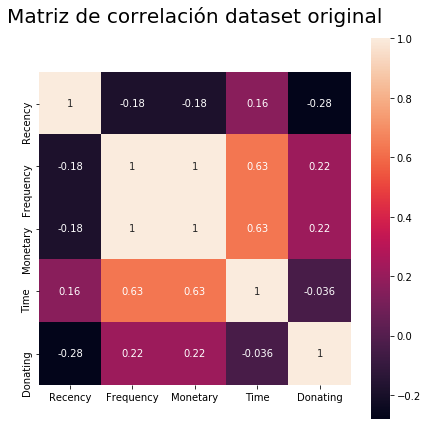

In [2]:
# Se revisa la matriz de correlación

plt.figure(figsize = (7,7))
plt.title("Matriz de correlación dataset original\n\n", fontsize = 20)
sns.heatmap(data.corr(), square = True, annot = True)
plt.show()

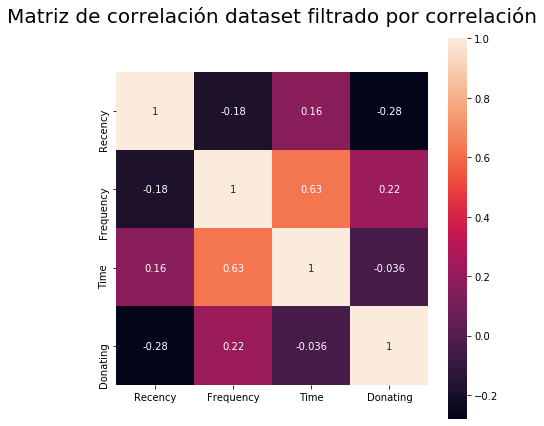

In [3]:
# Como se pudo observar las variables Monetary y Frequency presentan una correlación muy alta
# por lo tanto se decide eliminar una de ellas

del data["Monetary"]
plt.figure(figsize = (7,7))
plt.title("Matriz de correlación dataset filtrado por correlación\n\n", fontsize = 20)
sns.heatmap(data.corr(), square = True, annot = True)

In [4]:
# Se da una mirada general a los datos
data.describe()

,Recency,Frequency,Time,Donating
count,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,34.282086,0.237968
std,8.095396,5.839307,24.376714,0.426124
min,0.000000,1.000000,2.000000,0.000000
25%,2.750000,2.000000,16.000000,0.000000
50%,7.000000,4.000000,28.000000,0.000000
75%,14.000000,7.000000,50.000000,0.000000
max,74.000000,50.000000,98.000000,1.000000


In [5]:
# Algunos valores presentan desviación estpandar alta, se decide entonces normalizar el conjunto de datos

for name in data.columns:
    if name!="Donating":# Donating no porque es el target y ya está binarizado
        data[name] = preprocessing.scale(data[name])

2. (Valor 0,5) Eliminar los registros que tengan datos faltantes, reportar cuántos registros se eliminan. Separar el conjunto en entrenamiento y prueba usando 75% de los datos para entrenamiento y 25% para prueba.

In [6]:
# ¿Cual es el máximo de datos faltantes en un mismo registro?
maximo_faltantes_por_filas = max(data.isnull().sum(axis = 1))
print("La cantidad de registros con datos faltantes es {}, por lo tanto no se elimina ninguno\n".format(maximo_faltantes_por_filas))


# Balanceo entre clases
g = data.groupby('Donating')
data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
data.reset_index(drop = True, inplace = True)
print(data["Donating"].value_counts())

# Separación en conjunto de entrenamiento y prueba
train, test = train_test_split(data, test_size = 0.25, random_state = 42, stratify = data["Donating"])

print("train:",train.shape)
print("test:", test.shape)

La cantidad de registros con datos faltantes es 0, por lo tanto no se elimina ninguno

1.0    178
0.0    178
Name: Donating, dtype: int64
train: (267, 4)
test: (89, 4)


In [7]:
# Estimación de hiperparámetros

# se deja comentada porque se demora mucho en ejecutar,
# sin embargo se construye el modelo con los resultados obtenidos 


#X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(train.drop(['Donating'],axis = 1), train['Donating'], test_size = 0.25, stratify = train["Donating"], randomstate = 42)

#parameter_space = {
#    'hidden_layer_sizes': [(h,n) for h in range(1,43) for n in range(0,10)],
#    'activation': ['logistic', 'tanh', 'relu'],
#    'alpha': [0.0001, 0.05],
#    'learning_rate': ['constant','adaptive'],
#    'solver': ['sgd', 'adam']
#}

#clf_mlp = MLPClassifier(max_iter = 2000)
#clf_mlp = GridSearchCV(clf_mlp, parameter_space, n_jobs=-1, cv=3, refit=True)
#clf_mlp.fit(X_train_hd, y_train_hd)

# Se identifican los parametros que producen el mejor modelo
#print("Mejores parametros MLP:")
#print(clf_mlp.best_params_)

# El resultado obtenido fue
# activation = "logistic", alpha = 0.0001, hidden_layer_sizes = (42, 9), learning_rate = "constant", solver = "adam"

3. (Valor 1,0) Elegir una de las técnicas vista en el curso para construir modelos de clasificación. Aplicar la técnica al conjunto de entrenamiento. Hacer un hold-out de 10 iteraciones y reportar los resultados obtenidos mostrándolos en un gráfico. Reportar la conclusión del análisis del gráfico.

In [8]:
# En esta celda se definen funciones que sirven para visualizar los resultaos del HoldOut

def resumen(lista, metrica):
    """
    Esta función sirve para mostrar la Media, la Desviación Estándar y el rango en el que se mueven
    los datos contenidos en la lista pasada por parámetro
    """
    N = len(lista)
    media = statistics.mean(lista)
    desviacion = statistics.stdev(lista)

    print("{}: Media: {}, Desviación Estándar: {} --> Rango ({},{})\n".format(metrica,round(media,2), round(desviacion,5),round(media - desviacion,5), round(media + desviacion, 5)))
    return desviacion

def mostrar_dispersion(metrica, y_pred, color):
    """
    Esta función sirve para mostrar el gráfico de dispersión de cada una de las métricas
    calculadas
    """
    plt.figure(figsize = (5,5))
    plt.title("Gráfico de Dispersión - {}\n".format(metrica), fontsize = 20)
    plt.xlabel("Particiones", fontsize = 20)
    
    if metrica !="F1 Score":
        plt.ylabel("{} Score".format(metrica), fontsize = 20)
    else:
        plt.ylabel("{}".format(metrica), fontsize = 20)
        
    plt.xticks([i for i in range(1,11)])
    plt.scatter([i for i in range(1,11)], y_pred, marker='o', color =  color)


-------------------------------------------------------------------------------------
Perceptrón Multicapa - Hold Out 

Precision: Media: 0.64, Desviación Estándar: 0.07911 --> Rango (0.56335,0.72158)

Recall: Media: 0.73, Desviación Estándar: 0.26779 --> Rango (0.45868,0.99426)

F1-score: Media: 0.65, Desviación Estándar: 0.21196 --> Rango (0.43794,0.86187)

-------------------------------------------------------------------------------------



Text(0, 0.5, 'Desviación Estándar')

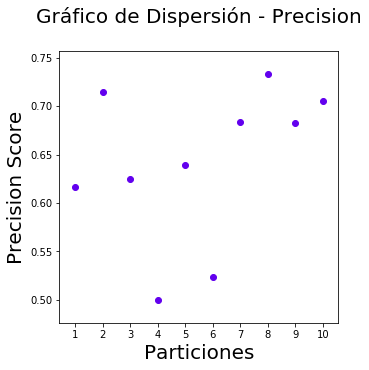

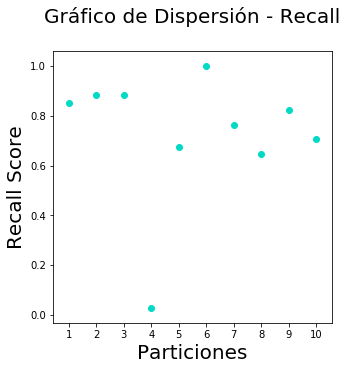

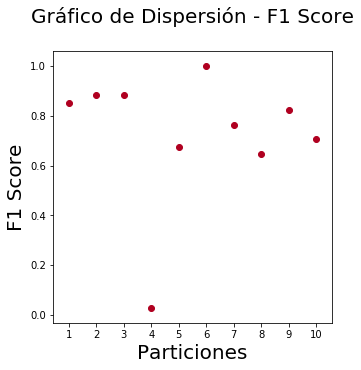

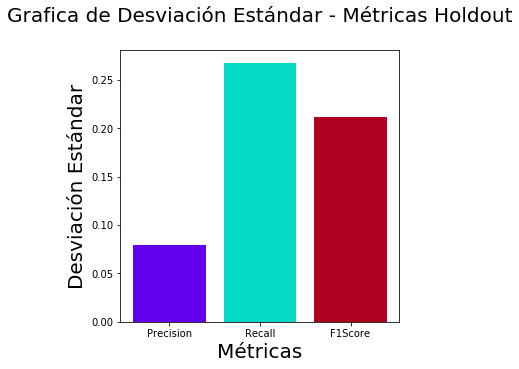

In [9]:
# HoldOut

N = 10

prec_mlp = list()
rec_mlp = list()
fscore_mlp = list()

for i in range(N):
    # Se usa el conjunto train para el HoldOut
    X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(train.drop(['Donating'],axis = 1), train['Donating'], test_size = 0.25, stratify = train["Donating"])
    
    #-------Perceptrón Multicapa--------------------------
    clf_mlp = MLPClassifier(max_iter = 2000,activation = "logistic", alpha = 0.0001, hidden_layer_sizes = (42, 9), learning_rate = "constant", solver = "adam")
    clf_mlp.fit(X_train_hd,y_train_hd)
    pred_mlp = clf_mlp.predict(X_test_hd)
    
    # Se calcula la precisión, el recall y f1 score de cada partición y se agrega a las listas declaradas
    #al inicio de la celda
    
    prec_mlp.append(precision_score(y_test_hd,pred_mlp))
    rec_mlp.append(recall_score(y_test_hd,pred_mlp))
    fscore_mlp.append(f1_score(y_test_hd,pred_mlp))


# Visualicemos el comportamiento de las métricas en el HoldOut
print("-------------------------------------------------------------------------------------")
name = "Perceptrón Multicapa - Hold Out \n"
print(name)

d1 = resumen(prec_mlp, "Precision")
d2 = resumen(rec_mlp, "Recall")
d3 = resumen(fscore_mlp, "F1-score")
print("-------------------------------------------------------------------------------------\n")

# Gráficos de dispersión

# Precision
mostrar_dispersion("Precision", prec_mlp, "#6200EE")

# Recall
mostrar_dispersion("Recall", rec_mlp, "#03DAC6")

# F1 - Score
mostrar_dispersion("F1 Score", rec_mlp, "#B00020")

# Comparativa Desviación Estándar en un solo gráfico de barras
x = ["Precision","Recall","F1Score"]
y = [d1,d2,d3]
plt.figure(figsize = (5,5))
plt.bar(x, y, color = ["#6200EE","#03DAC6","#B00020"])
plt.title("Grafica de Desviación Estándar - Métricas Holdout\n", fontsize = 20)
plt.xlabel("Métricas", fontsize = 20)
plt.ylabel("Desviación Estándar", fontsize = 20)

<div style="text-align: justify">
    Como se puede apreciar, la variabilidad de las métricas obtenidas durante el proceso de holdout es bastante alta, los resultados obtenidos con cada partición del conjunto de datos son notablemente diferentes. Las métricas no siguen una tendencia clara y se evidencia una dispersión muy amplia, se puede concluir entonces que el conjunto de datos es poco estable, pues los resultados están ajustados a la partición que se tenga en un momento dado, lo cual toma sentido con las pocas variables que lo conforman y la insuficiencia semántica de la información recolectada.</div>

4. (Valor 1,0) Aplicar el conjunto de test al modelo producido en el punto anterior y reportar los resultados usando las métricas vistas en clase y provee la librería. Analizar los datos y reportar además de los resultados la conclusión del análisis.

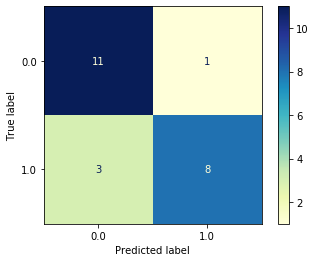

Precision:  0.8888888888888888
Recall:     0.7272727272727273
F1score:    0.7999999999999999


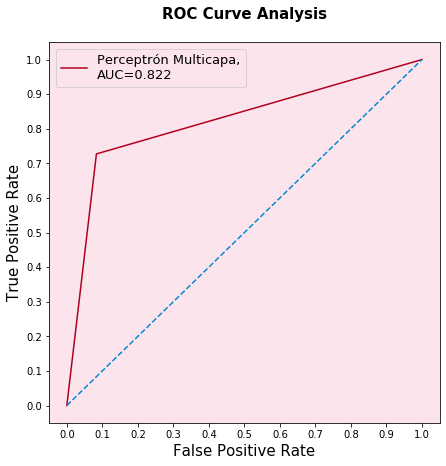

In [10]:
# Se usa el conjunto test para evaluar el modelo con datos que nunca ha visto
X_train, X_test, y_train, y_test = train_test_split(test.drop(['Donating'],axis=1), test['Donating'], test_size=0.25, random_state=42, stratify = test["Donating"])

pred = clf_mlp.predict(X_test)

# Se grafica la Matriz de Confusión
plot_confusion_matrix(clf_mlp, X_test, y_test, cmap = plt.cm.YlGnBu)
plt.show()

# Se muestran las métricas de evaluación
print("Precision: ",precision_score(y_test,pred))
print("Recall:    ",recall_score(y_test,pred))
print("F1score:   ",f1_score(y_test,pred))


# Curva ROC
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test,pred)
auc_mlp = metrics.roc_auc_score(y_test,pred)
result_table = pd.DataFrame(columns = ['classifiers', 'fpr','tpr','auc'])
result_table = result_table.append({'classifiers':"Perceptrón Multicapa",
                                        'fpr':fpr_mlp, 
                                        'tpr':tpr_mlp, 
                                        'auc':auc_mlp}, ignore_index = True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(7,7))

for i in result_table.index:
    plt.rcParams['axes.facecolor'] = '#fce4ec'
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label = "{},\nAUC={:.3f}".format(i, result_table.loc[i]['auc']), color  = "#B00020")

    
plt.plot([0,1], [0,1], color='#0288d1', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis\n', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='upper left')

plt.show()

<div style="text-align: justify">
    Debido a la variabilidad de los resultados es difícil hacer un análisis concreto del modelo en general, ya que los mismos cambian en cada ejecución, sin embargo, es evidente que el modelo es bastante  inestable, ya que en varias ejecuciones se pueden tener scores cercanos a 70-80, y en otras 40-60, pero como se mencionó en el punto anterior, esto se produce debido a la poca información suministrada en el conjunto de datos, haciendo muy difícil el aprendizaje y en consecuencia la construcción de un modelo capaz de predecir si una persona donó o no sangre en marzo del 2016, quizá las variables que se tuvieron en cuenta al momento de consolidar la base de datos no fueron suficientes para poder realizar la predicción. En aras de construir un modelo estable capaz de realizarla, se podría pensar en otras variables que puedan influir en la decisión de donar o no sangre, del mismo modo, si se pueden tomar más registros de cada una de estas variables se podrá construir un modelo mucho más estable y seguramente con mejores predicciones que las que se tienen con el modelo actual </div>